In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

ImportError: No module named 'seaborn'

In [2]:
import requests
import time
import json

In [45]:
docs=[]
n = 100 #number of pages

#get first 100 pages of json dictionaries
for i in range(1,n+1): 
    url = "http://api.nytimes.com/svc/search/v2/articlesearch.json?fq=news_desk:Health&page=%d&api-key=5cdab36b05348a4da2e74046dfb16a03:17:73541790" % i
    page = requests.get(url)
    pagedocs = page.json()['response']['docs']
    time.sleep(1)
    
    #append each separate dictionary from a page to docs
    for j in range(0,len(pagedocs)):
        docs.append(pagedocs[j])

In [46]:
fd=open("nytdocs100.json","w")
json.dump(docs, fd)
fd.close()

In [48]:
docsinfo = []
for d in docs:
    obs = {}
    obs['id'] = d['_id']
    obs['type'] = d['type_of_material']
    obs['date'] = d['pub_date'][0:10]
    obs['headline'] = d['headline']['main']
    obs['abstract'] = d['abstract']
    obs['paragraph'] = d['lead_paragraph']
    
    #Take out abstracts and lead paragraphs with none to join text
    if obs['abstract'] is None:
        a = ' '
    else: 
        a = obs['abstract']
    if obs['paragraph'] == 'TK TK TK' or obs['paragraph'] is None:
        p = ' '
    else:
        p = obs['paragraph']
    
    text = [obs['headline'], p, a]
    obs['text'] = " ".join(text)
    
    docsinfo.append(obs)

In [49]:
docsdf = pd.DataFrame(docsinfo)
docsdf.head()

,abstract,date,headline,id,paragraph,text,type
0,None,2015-09-08,DNA’s Defenses,55ef25127988104d070a17db,Evelyn M. Witkin and Stephen J. Elledge receiv...,DNA’s Defenses Evelyn M. Witkin and Stephen J....,Video
1,None,2015-09-08,On the Front Lines of an Outbreak,55ef250f7988104d070a17d8,Doctors Without Borders received a Lasker awar...,On the Front Lines of an Outbreak Doctors With...,Video
2,None,2015-08-31,Born in Chiapas,55e49d1e7988100a53ed5e6c,A look at the traditional midwife in southern ...,Born in Chiapas A look at the traditional midw...,Slideshow
3,None,2015-07-20,The Weekly Health Quiz,52cbfb1a7988100c7a2bc5f7,"In the news: nail polish dangers, distracted d...",The Weekly Health Quiz In the news: nail polis...,Interactive Feature
4,None,2015-07-20,Paying Till It Hurts,535155ad798810363105db65,A series of articles by the New York Times cor...,Paying Till It Hurts A series of articles by t...,Interactive Feature


In [68]:
docsdf.to_csv("docsdf100.csv")

In [53]:
docsdf.shape

(792, 7)

In [55]:
docsdf.dtypes

abstract     object
date         object
headline     object
id           object
paragraph    object
text         object
type         object
dtype: object

Make date column a date type

http://stackoverflow.com/questions/9504356/convert-string-into-date-type-on-python

http://stackoverflow.com/questions/16852911/how-do-i-convert-dates-in-a-pandas-data-frame-to-a-date-data-type  ***

In [60]:
docsdf['date'] = pd.to_datetime(docsdf['date'])
docsdf.head()

,abstract,date,headline,id,paragraph,text,type
0,None,2015-09-08,DNA’s Defenses,55ef25127988104d070a17db,Evelyn M. Witkin and Stephen J. Elledge receiv...,DNA’s Defenses Evelyn M. Witkin and Stephen J....,Video
1,None,2015-09-08,On the Front Lines of an Outbreak,55ef250f7988104d070a17d8,Doctors Without Borders received a Lasker awar...,On the Front Lines of an Outbreak Doctors With...,Video
2,None,2015-08-31,Born in Chiapas,55e49d1e7988100a53ed5e6c,A look at the traditional midwife in southern ...,Born in Chiapas A look at the traditional midw...,Slideshow
3,None,2015-07-20,The Weekly Health Quiz,52cbfb1a7988100c7a2bc5f7,"In the news: nail polish dangers, distracted d...",The Weekly Health Quiz In the news: nail polis...,Interactive Feature
4,None,2015-07-20,Paying Till It Hurts,535155ad798810363105db65,A series of articles by the New York Times cor...,Paying Till It Hurts A series of articles by t...,Interactive Feature


In [61]:
docsdf.dtypes

abstract             object
date         datetime64[ns]
headline             object
id                   object
paragraph            object
text                 object
type                 object
dtype: object

TypeError: len() of unsized object

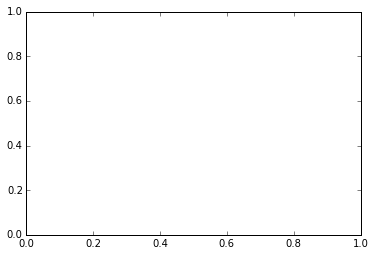

In [64]:
plt.hist(docsdf['type'])

In [67]:
docsdf['text'][0:20]

0     DNA’s Defenses Evelyn M. Witkin and Stephen J....
1     On the Front Lines of an Outbreak Doctors With...
2     Born in Chiapas A look at the traditional midw...
3     The Weekly Health Quiz In the news: nail polis...
4     Paying Till It Hurts A series of articles by t...
5     Share Your Experience as a Combat Soldier The ...
6     Share Your Experiences as a Female Soldier or ...
7                                           Ed Note    
8                                Oncologist Consult    
9                                        ID Consult    
10    Admission Notes The first visit to the hospita...
11    Metabolic Consult There was concern that the p...
12    MRI Report The findings from an M.R.I. of the ...
13    Rheumatologist Consult The patient met with a ...
14    Stillbirth: Share Your Story Stillbirth is not...
15    Time Is Muscle: Understanding Heart Attacks In...
16    Multiple Sclerosis Notes Notes from the patien...
17    First Visit with Dr. Schepp Note from the 